In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [66]:
df_sun = pd.read_csv("sun_0.csv", header=None).T
df_height = pd.read_csv("height_0.csv", header=None).T
df_height.columns = ['height']
df_sun.columns = ['sun']
df_height.head()

,height
0,1.500000
1,7.739497
2,7.236436
3,8.241912
4,7.785164


In [67]:
df_sun.head()

,sun
0,9
1,9
2,0
3,5
4,0


In [68]:
df_sun['height'] = df_height
df_sun

,sun,height
0,9,1.500000
1,9,7.739497
2,0,7.236436
3,5,8.241912
4,0,7.785164
...,...,...
345,6,7.504604
346,0,6.079107
347,5,5.654387
348,9,1.500000


In [69]:
df = df_sun

# What type of formula would we like to apply?
- First apply log transformation to the sun hours
- Then, based on the log(sun), reduce (if ice) or increase (if tree) the current height, with a fraction proportional to the log(sun)

In [70]:
MAX_HEIGHT = 0

def move(sun_hours, height):
    global MAX_HEIGHT
    if height > MAX_HEIGHT:
        MAX_HEIGHT = height
    if sun_hours == 0:
        return height
    if height == 0:
        height = 1
    shift_now = shift(height)
    true_shift = np.log(sun_hours) * shift_now
    if height > 0:
        to_return = height + true_shift
    else:
        to_return = height - true_shift
    return to_return

def shift(height):
    return -np.sign(height) * (np.abs(height)) ** (1/4) / 6

In [71]:
height = 100
sun = [3, 3, 3, 4, 5, 5, 4, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 10, 10, 10, 10]

print(len(sun))

i = 0
while i < len(sun):
    height = move(sun[i], height)
    print(height)
    i += 1

23
99.4209804837264
98.84280095253897
98.2654638569092
97.53801170409159
96.69503329431471
95.85388219097726
95.130934902671
94.29320615640005
93.45732780435253
92.62330808921668
91.69688679287059
90.77279076017517
89.85103177464546
88.85252204761768
87.7884699179462
86.72761783045017
85.66998525248634
84.55586935603358
83.44539345637645
82.28550819472636
81.12967469582448
79.97792164325756
78.83027823426444


# Transformation for a csv

In [72]:
def change_heights(df):
    new_height = df.apply(lambda row: move(row['sun'], row['height']), axis=1)
    df['height'] = new_height
    return df

In [73]:
change_heights(df)

,sun,height
0,9,1.094729
1,9,7.128694
2,0,7.236436
3,5,7.787416
4,0,7.785164
...,...,...
345,6,7.010338
346,0,6.079107
347,5,5.240750
348,9,1.094729


It works!

# Putting it all together

In [91]:
i = 0

In [93]:
SUN_FILE_NAME = "SolarValues.csv"
HEIGHT_FILE_NAME = "height_" + str(i) + ".csv"

df_sun = pd.read_csv(SUN_FILE_NAME, header=None).T
#df_height = pd.read_csv(HEIGHT_FILE_NAME, header=None)
df_height = df_total['height']

df_sun.rename(columns={0: "sun"}, inplace=True)
#df_height.rename(columns={0: "height"}, inplace=True)

df_total = pd.concat([df_sun, df_height], axis=1)
df_total = change_heights(df_total)

tree_list = [i if i > 0 else 0 for i in df_total['height'].values]
ice_list = [i if i <= 0 else 0 for i in df_total['height'].values]

df_tree = pd.DataFrame(tree_list)
df_ice = pd.DataFrame(ice_list)

i += 1
df_total['height'].abs().to_csv(
    "height_" + str(i) + ".csv",
    header=False,
    index=False,
    sep="\n"
    )
df_tree.to_csv(
    "tree.csv",
    header=False,
    index=False,
    sep="\n"
)
df_ice.to_csv(
    "ice.csv",
    header=False,
    index=False,
    sep="\n"
)

FileNotFoundError: [Errno 2] No such file or directory: 'SolarValues.csv'

In [90]:
df_tree = pd.DataFrame(tree_list)

,0
0,0.720144
1,6.530316
2,7.236436
3,7.339320
4,7.785164
...,...
345,6.524420
346,6.079107
347,4.834895
348,0.720144


In [61]:
df_total.height.abs()

0      1.075295
1      7.099405
2      6.746646
3      7.591675
4      7.117595
         ...   
345    6.869425
346    5.476514
347    5.119956
348    1.075295
349    1.041666
Name: height, Length: 350, dtype: float64

# Misc

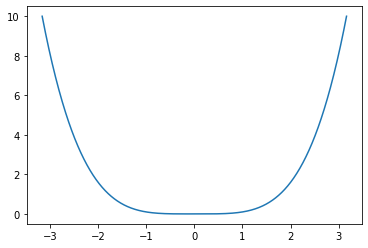

In [62]:
x = np.linspace(-sqrt(10), sqrt(10), 1000)
y = x**4 / 10

fig, ax = plt.subplots()
ax.plot(x, y)

In [63]:
shift(100)

-0.5270462766947299

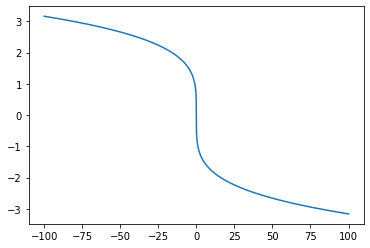

In [64]:
x = np.linspace(-100, 100, 1000)
y = -np.sign(x) * (np.abs(x)) ** (1 / 4)

fig, ax = plt.subplots()
ax.plot(x, y)

In [65]:
np.log(12)

2.4849066497880004